## Análisis estadístico de los resultados

Subir ficheros

In [116]:
from google.colab import files

uploaded = files.upload()

Saving JMeter_POST_High_REST_300.csv to JMeter_POST_High_REST_300.csv
Saving JMeter_POST_High_REST_500.csv to JMeter_POST_High_REST_500.csv
Saving JMeter_POST_High_REST_100.csv to JMeter_POST_High_REST_100.csv
Saving JMeter_POST_High_gRPC_100.csv to JMeter_POST_High_gRPC_100.csv
Saving JMeter_POST_High_gRPC_300.csv to JMeter_POST_High_gRPC_300.csv
Saving JMeter_POST_High_gRPC_500.csv to JMeter_POST_High_gRPC_500.csv


Importar librerías

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

Importar archivos csv

In [118]:
rest_df100 = pd.read_csv('JMeter_POST_High_REST_100.csv')
grpc_df100 = pd.read_csv('JMeter_POST_High_gRPC_100.csv')
rest_df300 = pd.read_csv('JMeter_POST_High_REST_300.csv')
grpc_df300 = pd.read_csv('JMeter_POST_High_gRPC_300.csv')
rest_df500 = pd.read_csv('JMeter_POST_High_REST_500.csv')
grpc_df500 = pd.read_csv('JMeter_POST_High_gRPC_500.csv')

# Asegurarse de que la columna "elapsed" esté en los datos
rest_elapsed100 = rest_df100['elapsed']
grpc_elapsed100 = grpc_df100['elapsed']
rest_elapsed300 = rest_df300['elapsed']
grpc_elapsed300 = grpc_df300['elapsed']
rest_elapsed500 = rest_df500['elapsed']
grpc_elapsed500 = grpc_df500['elapsed']


Crear tablas con estadísticas descriptivas

In [119]:
def get_descriptive_stats(data):
    return {
        'Media': np.mean(data),
        'Mediana': np.median(data),
        'Desviación estándar': np.std(data, ddof=1),
        'Percentil 25': np.percentile(data, 25),
        'Percentil 75': np.percentile(data, 75)
    }

# Obtener estadísticas para cada conjunto
rest_stats100 = get_descriptive_stats(rest_elapsed100)
grpc_stats100 = get_descriptive_stats(grpc_elapsed100)
rest_stats300 = get_descriptive_stats(rest_elapsed300)
grpc_stats300 = get_descriptive_stats(grpc_elapsed300)
rest_stats500 = get_descriptive_stats(rest_elapsed500)
grpc_stats500 = get_descriptive_stats(grpc_elapsed500)

# Crear DataFrame con los resultados
stats_df = pd.DataFrame([rest_stats100, grpc_stats100, rest_stats300, grpc_stats300, rest_stats500, grpc_stats500], index=['REST_100', 'gRPC_100', 'REST_300', 'gRPC_300', 'REST_500', 'gRPC_500'])
stats_df = stats_df.round(2)  # Redondear para una mejor visualización

# Mostrar la tabla
display(stats_df)

,Media,Mediana,Desviación estándar,Percentil 25,Percentil 75
REST_100,5421.98,4441.5,1750.39,4099.25,6633.25
gRPC_100,4564.41,4050.5,1243.94,3909.00,4426.75
REST_300,5593.27,5483.0,924.09,4854.75,6135.50
gRPC_300,4501.54,4441.0,269.31,4333.75,4578.00
REST_500,5020.01,4482.5,1639.11,4162.75,5252.50
gRPC_500,4515.66,4404.0,521.52,4258.00,4589.50


Boxplot para comparar REST y gRPC

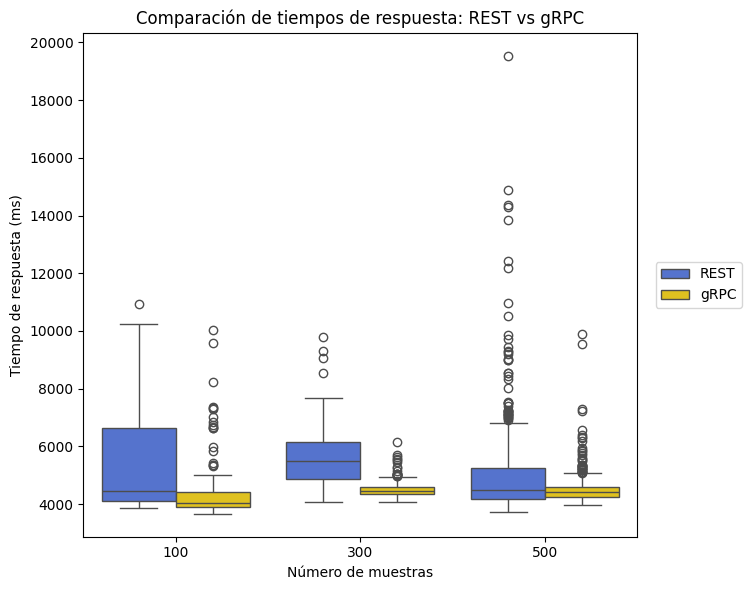

In [121]:
# Construir DataFrame con todos los datos
elapsed_df = pd.DataFrame({
    'elapsed': (
        list(rest_elapsed100) + list(grpc_elapsed100) +
        list(rest_elapsed300) + list(grpc_elapsed300) +
        list(rest_elapsed500) + list(grpc_elapsed500)
    ),
    'Tipo': (
        ['REST'] * len(rest_elapsed100) + ['gRPC'] * len(grpc_elapsed100) +
        ['REST'] * len(rest_elapsed300) + ['gRPC'] * len(grpc_elapsed300) +
        ['REST'] * len(rest_elapsed500) + ['gRPC'] * len(grpc_elapsed500)
    ),
    'Muestras': (
        ['100'] * (len(rest_elapsed100) + len(grpc_elapsed100)) +
        ['300'] * (len(rest_elapsed300) + len(grpc_elapsed300)) +
        ['500'] * (len(rest_elapsed500) + len(grpc_elapsed500))
    )
})

# Gráfico de cajas
plt.figure(figsize=(9, 6))
sns.boxplot(x='Muestras', y='elapsed', hue='Tipo', data=elapsed_df,
            palette={'REST': 'royalblue', 'gRPC': 'gold'})

# Títulos y etiquetas
plt.title('Comparación de tiempos de respuesta: REST vs gRPC')
plt.ylabel('Tiempo de respuesta (ms)')
plt.xlabel('Número de muestras')

# Leyenda fuera del gráfico a la derecha
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

# Ajustar diseño para que la leyenda no se corte
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

Test de normalidad Shapiro-Wilk

In [123]:
from scipy import stats

# Shapiro-Wilk para ver si siguen distribución normal
shapiro_rest100 = stats.shapiro(rest_elapsed100)
shapiro_grpc100 = stats.shapiro(grpc_elapsed100)
shapiro_rest300 = stats.shapiro(rest_elapsed300)
shapiro_grpc300 = stats.shapiro(grpc_elapsed300)
shapiro_rest500 = stats.shapiro(rest_elapsed500)
shapiro_grpc500 = stats.shapiro(grpc_elapsed500)

print("\nTest de normalidad (Shapiro-Wilk):")
print(f"REST_100:  W = {shapiro_rest100.statistic:.4f}, p-valor = {shapiro_rest100.pvalue:.4f}")
print(f"gRPC_100:  W = {shapiro_grpc100.statistic:.4f}, p-valor = {shapiro_grpc100.pvalue:.4f}")
print(f"REST_300:  W = {shapiro_rest300.statistic:.4f}, p-valor = {shapiro_rest300.pvalue:.4f}")
print(f"gRPC_300:  W = {shapiro_grpc300.statistic:.4f}, p-valor = {shapiro_grpc300.pvalue:.4f}")
print(f"REST_500:  W = {shapiro_rest500.statistic:.4f}, p-valor = {shapiro_rest500.pvalue:.4f}")
print(f"gRPC_500:  W = {shapiro_grpc500.statistic:.4f}, p-valor = {shapiro_grpc500.pvalue:.4f}")

if shapiro_rest100.pvalue > 0.05 and shapiro_grpc100.pvalue > 0.05:
    print("Con 100 muestras ambos conjuntos siguen una distribución normal.")
else:
    print("Con 100 muestras al menos uno de los conjuntos NO sigue una distribución normal.")

if shapiro_rest300.pvalue > 0.05 and shapiro_grpc300.pvalue > 0.05:
    print("Con 300 muestras ambos conjuntos siguen una distribución normal.")
else:
    print("Con 300 muestras al menos uno de los conjuntos NO sigue una distribución normal.")

if shapiro_rest500.pvalue > 0.05 and shapiro_grpc500.pvalue > 0.05:
    print("Con 500 muestras ambos conjuntos siguen una distribución normal.")
else:
    print("Con 500 muestras al menos uno de los conjuntos NO sigue una distribución normal.")



Test de normalidad (Shapiro-Wilk):
REST_100:  W = 0.8092, p-valor = 0.0000
gRPC_100:  W = 0.6376, p-valor = 0.0000
REST_300:  W = 0.9493, p-valor = 0.0000
gRPC_300:  W = 0.8255, p-valor = 0.0000
REST_500:  W = 0.6168, p-valor = 0.0000
gRPC_500:  W = 0.5853, p-valor = 0.0000
Con 100 muestras al menos uno de los conjuntos NO sigue una distribución normal.
Con 300 muestras al menos uno de los conjuntos NO sigue una distribución normal.
Con 500 muestras al menos uno de los conjuntos NO sigue una distribución normal.


Tests estadísticos

In [125]:
alpha = 0.05

if shapiro_rest100.pvalue > 0.05 and shapiro_grpc100.pvalue > 0.05:
  # Test paramétrico T-student
    t_stat100, p_val100 = stats.ttest_ind(rest_elapsed100, grpc_elapsed100)
    print(f"\nT-test (Student): t = {t_stat100:.2f}, p = {p_val100:.4f}")

    if p_val100 < alpha:
        print("Con 100 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.")
    else:
        print("Con 100 muestras no se puede rechazar la hipótesis nula: no hay diferencia significativa.")
else:
    # Test no paramétrico Mann-Whitney U
    u_stat100, p_val100 = stats.mannwhitneyu(rest_elapsed100, grpc_elapsed100, alternative='two-sided')
    print(f"\nTest Mann-Whitney U: U = {u_stat100:.2f}, p = {p_val100:.4f}")

    if p_val100 < alpha:
        print("Con 100 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.")
    else:
        print("Con 100 muestras no se puede rechazar la hipótesis nula: no hay diferencia significativa.")


if shapiro_rest300.pvalue > 0.05 and shapiro_grpc300.pvalue > 0.05:
  # Test paramétrico T-student
    t_stat300, p_val300 = stats.ttest_ind(rest_elapsed300, grpc_elapsed300)
    print(f"\nT-test (Student): t = {t_stat300:.2f}, p = {p_val300:.4f}")

    if p_val300 < alpha:
        print("Con 300 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.")
    else:
        print("Con 300 muestras no se puede rechazar la hipótesis nula: no hay diferencia significativa.")
else:
    # Test no paramétrico Mann-Whitney U
    u_stat300, p_val300 = stats.mannwhitneyu(rest_elapsed300, grpc_elapsed300, alternative='two-sided')
    print(f"\nTest Mann-Whitney U: U = {u_stat300:.2f}, p = {p_val300:.4f}")

    if p_val300 < alpha:
        print("Con 300 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.")
    else:
        print("Con 300 muestras no se puede rechazar la hipótesis nula: no hay diferencia significativa.")


if shapiro_rest500.pvalue > 0.05 and shapiro_grpc500.pvalue > 0.05:
  # Test paramétrico T-student
    t_stat500, p_val500 = stats.ttest_ind(rest_elapsed500, grpc_elapsed500)
    print(f"\nT-test (Student): t = {t_stat500:.2f}, p = {p_val500:.4f}")

    if p_val500 < alpha:
        print("Con 500 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.")
    else:
        print("Con 500 muestras no se puede rechazar la hipótesis nula: no hay diferencia significativa.")
else:
    # Test no paramétrico Mann-Whitney U
    u_stat500, p_val500 = stats.mannwhitneyu(rest_elapsed500, grpc_elapsed500, alternative='two-sided')
    print(f"\nTest Mann-Whitney U: U = {u_stat500:.2f}, p = {p_val500:.4f}")

    if p_val500 < alpha:
        print("Con 500 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.")
    else:
        print("Con 500 muestras no se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Test Mann-Whitney U: U = 7132.50, p = 0.0000
Con 100 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.

Test Mann-Whitney U: U = 79886.00, p = 0.0000
Con 300 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.

Test Mann-Whitney U: U = 134548.00, p = 0.0366
Con 500 muestras rechazamos la hipótesis nula: hay diferencia significativa entre REST y gRPC.


Representar gráfico comparativo de Throughput

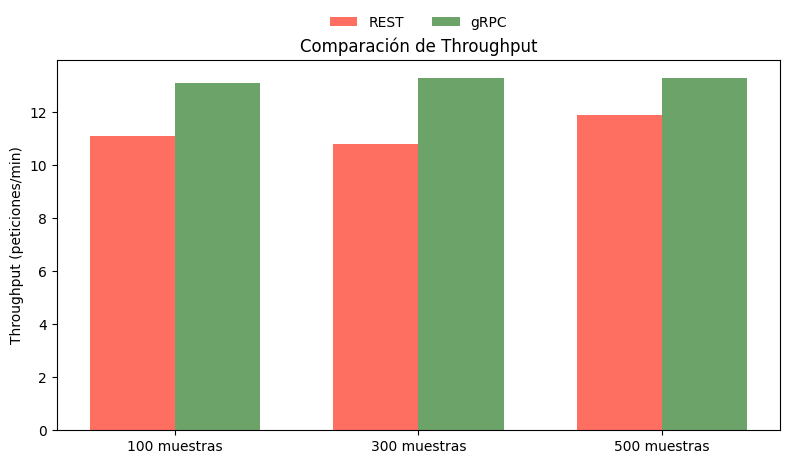

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de throughput en peticiones/min
throughput_rest = [11.1, 10.8, 11.9]   # REST: 100, 300, 500 muestras
throughput_grpc = [13.1, 13.3, 13.3]   # gRPC: 100, 300, 500 muestras

# Etiquetas del eje X
muestras = ['100 muestras', '300 muestras', '500 muestras']

# Posiciones en el eje X
x = np.arange(len(muestras))
width = 0.35  # ancho de las barras

# Crear gráfica
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, throughput_rest, width, label='REST', color='#FF6F61')
plt.bar(x + width/2, throughput_grpc, width, label='gRPC', color='#6BA368')

# Añadir etiquetas y títulos
plt.ylabel('Throughput (peticiones/min)')
plt.title('Comparación de Throughput')
plt.xticks(x, muestras)

# Colocar la leyenda fuera del gráfico (arriba)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)

# Ajustar diseño para que no se corte nada
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la gráfica
plt.show()


Representar grafico comparativo de consumo de energía

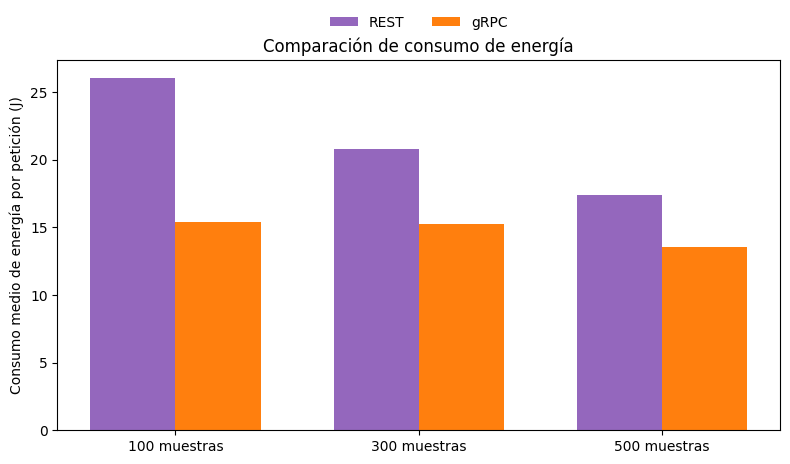

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de consumo medio de energía por petición (Julios)
energy_rest = [26.044, 20.783, 17.424]   # REST: 100, 300, 500 muestras
energy_grpc = [15.4, 15.223, 13.54]   # gRPC: 100, 300, 500 muestras

# Etiquetas del eje X
muestras = ['100 muestras', '300 muestras', '500 muestras']

# Posiciones en el eje X
x = np.arange(len(muestras))
width = 0.35  # ancho de cada barra

# Crear gráfica
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, energy_rest, width, label='REST', color='#9467bd')   # morado
plt.bar(x + width/2, energy_grpc, width, label='gRPC', color='#ff7f0e')  # naranja

# Añadir títulos y etiquetas
plt.ylabel('Consumo medio de energía por petición (J)')
plt.title('Comparación de consumo de energía')
plt.xticks(x, muestras)

# Leyenda arriba, bien colocada
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=False)

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la gráfica
plt.show()


Determinar si existe correlación entre el tiempo de respuesta y el consumo de energía

In [127]:
import numpy as np
from scipy.stats import shapiro, pearsonr, spearmanr

def determinar_correlacion(data1, data2, alpha=0.05):
    # Verificar que los datos tengan la misma longitud
    if len(data1) != len(data2):
        raise ValueError("Los dos conjuntos de datos deben tener la misma longitud.")

    # Prueba de normalidad Shapiro-Wilk
    stat1, p1 = shapiro(data1)
    stat2, p2 = shapiro(data2)

    print(f"Shapiro-Wilk para data1: W = {stat1:.4f}, p-valor = {p1:.4f}")
    print(f"Shapiro-Wilk para data2: W = {stat2:.4f}, p-valor = {p2:.4f}")

    ambos_normales = p1 > alpha and p2 > alpha

    if ambos_normales:
        print("✅ Ambos conjuntos de datos siguen una distribución normal.")
        corr, p_value = pearsonr(data1, data2)
        metodo = "Pearson"
    else:
        print("⚠️ Al menos uno de los conjuntos no sigue una distribución normal.")
        corr, p_value = spearmanr(data1, data2)
        metodo = "Spearman"

    print(f"\n📊 Coeficiente de correlación ({metodo}): {corr:.4f}")
    print(f"📉 p-valor: {p_value:.4f}")

    # Interpretación
    if p_value < alpha:
        print(f"✅ Existe una correlación estadísticamente significativa entre los datos (p < {alpha}).")
    else:
        print(f"❌ No se detecta una correlación estadísticamente significativa entre los datos (p ≥ {alpha}).")

    return metodo, corr, p_value

# Ejemplo de uso
if __name__ == "__main__":
    data1 = np.array([2397, 2409, 2388, 2431, 2439, 2457, 2534, 2756, 2524, 2667, 2511, 2708, 3146, 3130, 3057, 2766, 2867, 2844, 2975, 4028, 3119, 3992, 2877, 4171, 3024, 4302, 3138, 4342, 2888, 4052, 5421, 4564, 5593, 4501, 5020, 4515])
    data2 = np.array([6.273, 6.037, 5.801, 5.927, 6.192, 5.986, 6.503, 6.945, 7.059, 6.548, 7.935, 6.619, 10.793, 10.186, 10.451, 9.313, 10.101, 9.675, 10.676, 10.53, 10.439, 10.568, 9.83, 10.868, 12.241, 11.988, 13.691, 11.984, 10.397, 10.969, 26.044, 15.4, 20.783, 15.223, 17.424, 13.54])

    determinar_correlacion(data1, data2)


Shapiro-Wilk para data1: W = 0.8578, p-valor = 0.0003
Shapiro-Wilk para data2: W = 0.8486, p-valor = 0.0002
⚠️ Al menos uno de los conjuntos no sigue una distribución normal.

📊 Coeficiente de correlación (Spearman): 0.9534
📉 p-valor: 0.0000
✅ Existe una correlación estadísticamente significativa entre los datos (p < 0.05).
